<a href="https://colab.research.google.com/github/Clarana12/puc-ciencia-de-dados-e-analytics-mvp-sprint2/blob/main/MVP_AnaClaraRodrigues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 2 - Machine Learning e Analytics
# Pontifícia Universidade Católica PUC-Rio
### Aluno (a). Ana Clara Rodrigues
#### MVP Sprint 2 (Abril/2024)



## 1.0 Definição do Problema
---

**Descrição do Problema**

O problema em questão envolve o diagnóstico precoce do Transtorno do Espectro do Autismo (TEA) em crianças. O TEA é uma condição complexa que afeta o desenvolvimento neurológico e comportamental, e a identificação precoce é crucial para intervenções eficazes e melhores resultados a longo prazo. No entanto, o diagnóstico do TEA pode ser desafiador, muitas vezes exigindo avaliações detalhadas por profissionais especializados.

**Qual o objetivo desse MVP?**

Nesse contexto, propomos o desenvolvimento de um modelo preditivo baseado em questionários preenchidos pelos pais ou cuidadores das crianças. O objetivo é criar um sistema de triagem que possa identificar potenciais sinais precoces de autismo com base nas respostas fornecidas. Isso permitiria uma triagem mais rápida e acessível, facilitando o encaminhamento para avaliações mais detalhadas por profissionais de saúde especializados.

**Como fazer isso?**

Nosso conjunto de dados será composto por características comportamentais relevantes, cuidadosamente selecionadas para maximizar a eficiência da triagem do TEA. Ao desenvolver esse modelo, buscamos contribuir para uma abordagem mais eficaz no rastreamento e diagnóstico precoce do autismo em crianças, visando melhorar os resultados e o acesso a intervenções adequadas.

**Premissas e Hipóteses:**

**Premissa:** O diagnóstico precoce do Transtorno do Espectro Autista (TEA) é essencial para reduzir os custos de saúde, porém os longos tempos de espera e procedimentos onerosos ressaltam a necessidade urgente de métodos de triagem eficazes.

**Hipótese:** Um modelo de machine learning treinado com um conjunto de dados utilizado para o rastreamento do autistmo em crianças, com características comportamentais relevantes, visando aprimorar a eficiência da triagem de TEA.

**Restrição ou Condição:** Não houve restrições ao selecionar os dados onde foi aproveitado todo o dataset.


**Sobre o *dataset* utilizado**

O dataset usado neste projeto será o **Autism screening data for toddlers** proveniente originalmente do https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers?resource=download

Como seus dados estão rotulados, trata-se de um **aprendizado supervisionado**.

O conjunto de dados foi desenvolvido pelo Dr. Fadi Fayez Thabtah usando um aplicativo móvel chamado ASDTests para rastrear autismo em crianças pequenas.

**Informações sobre os atributos:**
1. **Case_No** - Um ID para cada criança.
2. **A1** - Seu filho olha para você quando você chama o nome dele? (númerico)
3. **A2** - É fácil para você manter o contato visual com seu filho? (numérico)
4. **A3** - Seu filho aponta para indicar algo? (numérico)
5. **A4** - Seu filho aponta para compartilhar interesse com vc? (numérico)
6. **A5** - Seu filho finge? (numérico)
7. **A6** - Seu filho segue para onde você está olhando? (numérico)
8. **A7** - Se você ou outra pessoa da família está visivelmente chateada, seu filho mostra sinanis de querer confortá-los? (numérico)
9. **A8** - Você descreveria as primeiras palavras de seu filho como? (numérico)
10. **A9** - Seu filho usa gestos simples? (numérico)
11. **A10** - Seu filho não encara nada sem propósito aparente? (numérico)
12. **Age_monts** - A idade da pessoa em meses. (numérico)
13. **Qchat-10-Score** - Pontuação total do Qchat.
14. **Sexo** - Gênero do indivíduo (m/f).
15. **Ethnicity** - Contém informações sobre as etnias. (sim/não)
16. **Jaundice** - Informa se a criança nasceu com icterícia.
17. **Family_mem_with_ASD** - Informa se a familia da criança tem algum membro com ASD/TEA. (sim/não)
18. **Quem completou o teste** - Quem foi a pessoa que fez o teste.
19. **Classe/ASD Traits** - Possui caracteristicas do TEA? (sim/não)

**OBS.:** A1 - A10 são algumas perguntas e suas respostas são dadas como rótulos '1' ou '0'.


## 2.0 Importações Necessárias - ok
---

Nessa seção inicial importaremos bibliotecas que utilizaremos no decorrer do MVP.


In [120]:
# Fazendo os imports das bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


Verificaremos a versão da matplotlib instalada.

In [121]:
# Verificando a versão da matplotlib instalada
print(f"A versão MatPlotLib instalada é a {mpl.__version__}")

A versão MatPlotLib instalada é a 3.7.1


Também configuraremos o MVP para não exibir mensagens de aviso.

In [122]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 3.0 Carga de Dados - ok
---
Nessa seção iremos usar a biblioteca Pandas (*Python Data Analysis Library*) para carregar de um arquivo .csv disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.

In [123]:
# Importando o arquivo em formato csv hospedado em meu Github
url = "https://raw.githubusercontent.com/Clarana12/puc-ciencia-de-dados-e-analytics-mvp-sprint2/main/Toddler%20Autism%20dataset%20July%202018.csv"

# Cabeçalho das colunas
colunas = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10','Age_Mons','Qchat-10-Score','Sex',
           'Ethnicity','Jaundice','Family_mem_with_ASD','Who completed the test','Class/ASD Traits']

tea_data = pd.read_csv(url,skiprows=1, names=colunas, delimiter = ',')

tea_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


## 4.0 Análise Exploratória de Dados
---
Nesta primeira etapa será realizada uma análise exploratória do dataset, onde iremos verificar como os dados estão organizados e como eles se relacionam, serão determinadas as suas dimensões, tipos de variáveis (qualitativas e quantitativas), além de uma primeira avaliação estatísticas dos dados numéricos.

### 4.1 Dimensões e Informações - ok
---
Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

Checaremos a identificação dos nomes dos atributos de coluna no *dataset*.

In [63]:
# Mostrando o nome dos atributos do dataset
tea_data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits'],
      dtype='object')

Iremos renomear algumas colunas para melhor identificação.

In [64]:
tea_data = tea_data.rename(columns={"Age_Mons":"Age Months",
                        "Family_mem_with_ASD":"Family Member with ASD",
                        "Class/ASD Traits": "ASD Traits"})
tea_data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age Months', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family Member with ASD', 'Who completed the test', 'ASD Traits'],
      dtype='object')

In [65]:
tea_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age Months,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family Member with ASD,Who completed the test,ASD Traits
1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


Checaremos a seguir o número de linhas e colunas do *dataset*.

In [66]:
# Mostra as dimensões (linhas e colunas) do dataset
print(tea_data.shape)

(1054, 18)


Podemos verificar acima que o dataset tem 1054 linhas (entradas) de 18 colunas (atributos).



Mostraremos a seguir a estrutura dos atributos do *dataset*. Com essas informações verificaremos os tipos dos atributos do *dataset* para identificar quais deles poderemos fazer suas possíveis conversões.


In [67]:
# Mostra as informações do dataset
print(tea_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1054 entries, 1 to 1054
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   A1                      1054 non-null   int64 
 1   A2                      1054 non-null   int64 
 2   A3                      1054 non-null   int64 
 3   A4                      1054 non-null   int64 
 4   A5                      1054 non-null   int64 
 5   A6                      1054 non-null   int64 
 6   A7                      1054 non-null   int64 
 7   A8                      1054 non-null   int64 
 8   A9                      1054 non-null   int64 
 9   A10                     1054 non-null   int64 
 10  Age Months              1054 non-null   int64 
 11  Qchat-10-Score          1054 non-null   int64 
 12  Sex                     1054 non-null   object
 13  Ethnicity               1054 non-null   object
 14  Jaundice                1054 non-null   object
 15  Family Me

Podemos observar que o conjunto de dados possui 6 colunas de tipo string, enquanto o restante é composto por dados numéricos. Além disso, não há valores **nulos** presentes, portanto não é necessário realizar tratamento de dados faltantes.







Verificaremos abaixo o número de valores únicos de cada atributo.

In [68]:
# Verificando o número de valores únicos dos atributos
tea_data.nunique()

A1                         2
A2                         2
A3                         2
A4                         2
A5                         2
A6                         2
A7                         2
A8                         2
A9                         2
A10                        2
Age Months                25
Qchat-10-Score            11
Sex                        2
Ethnicity                 11
Jaundice                   2
Family Member with ASD     2
Who completed the test     5
ASD Traits                 2
dtype: int64

Percebemos que o nosso *dataset* não possui atributo de coluna com um único valor. Aqueles que possuem apenas dois valores são representados por "Sim/Não" ou "0/1".

Isso também nos leva a perceber que não há redundância de linhas no nosso *dataset*.

In [69]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
tea_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
A1,1054.0,0.563567,0.496178,0.0,0.0,1.0,1.0,1.0
A2,1054.0,0.448767,0.497604,0.0,0.0,0.0,1.0,1.0
A3,1054.0,0.401328,0.490400,0.0,0.0,0.0,1.0,1.0
A4,1054.0,0.512334,0.500085,0.0,0.0,1.0,1.0,1.0
A5,1054.0,0.524668,0.499628,0.0,0.0,1.0,1.0,1.0
A6,1054.0,0.576850,0.494293,0.0,0.0,1.0,1.0,1.0
A7,1054.0,0.649905,0.477226,0.0,0.0,1.0,1.0,1.0
A8,1054.0,0.459203,0.498569,0.0,0.0,0.0,1.0,1.0
A9,1054.0,0.489564,0.500128,0.0,0.0,0.0,1.0,1.0
A10,1054.0,0.586338,0.492723,0.0,0.0,1.0,1.0,1.0


Durante a análise exploratória dos dados, notamos que os atributos Sex, Ethnicity, Jaundice, Family Member with ASD, Who completed the test e ASD Traits não estão incluídos no resumo estatístico. Para permitir sua utilização na modelagem, faremos a conversão dessas colunas categóricas em valores numéricos utilizando o método de codificação conhecido como Label Encoding.

### 4.2 Visualizações Unimodais - ok
---
Nesta seção, exploraremos perguntas e análises gráficas baseadas em atributos individuais. Por meio de visualizações unimodais, examinaremos como os atributos isolados podem influenciar nossos dados e ajudar na compreensão de padrões e distribuições em nosso modelo. Essas análises fornecerão insights valiosos sobre o comportamento de cada atributo e sua relação com a variável de interesse.


**Qual é a porcentagem de crianças afetadas pelo TEA?**

---


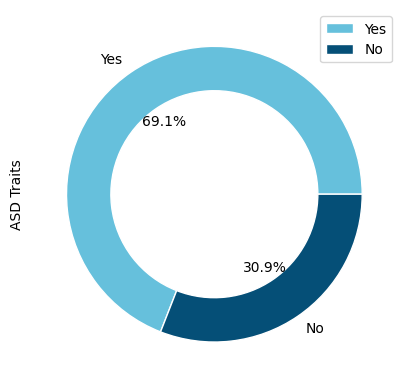

In [70]:
# Criar o gráfico de pizza com a cor azul
tea_data["ASD Traits"].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'), colors=['#66C0DC', '#054F77'],label="ASD Traits")

# Definir os rótulos da legenda
labels = tea_data["ASD Traits"].value_counts().index

# Adicionar legenda
plt.legend(labels=labels, loc="upper right")

# Exibir o gráfico
plt.show()



Pode-se estimar que cerca de **69,1%** das crianças no mundo são afetadas pelo Transtorno do Espectro do Autismo.

**Quais comportamentos de A1 a A10 mais contribuem nas taxas de TEA?**

---



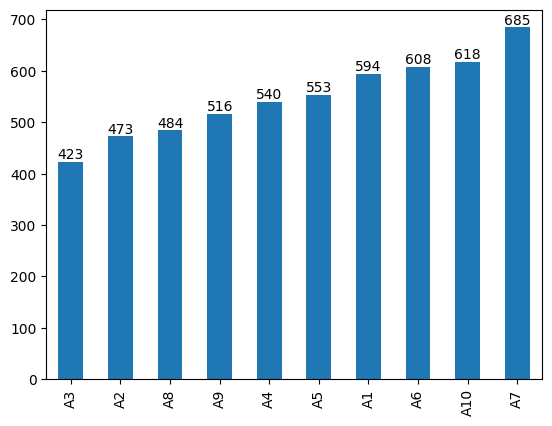

In [71]:
ax = tea_data.iloc[:, :10].sum().sort_values().plot(kind="bar")
ax.bar_label(ax.containers[0]);


Foi observado nos dados que a maioria das crianças demonstrava cuidado em relação aos pais quando estes estavam visivelmente chateados. Por outro lado, apenas 423 crianças manifestaram um desejo por brinquedos ou algo semelhante.

**Countplots**

---
Para avaliação dos dados categóricos iremos utiliar os countplots que são gráficos que mostram a distribuição da frequência de ocorrência de cada valor único em uma variável categórica.

Esses gráficos são úteis para visualizar a distribuição de dados categóricos e identificar padrões ou discrepâncias nos dados.

Neste caso específico, vamos exibir um countplot para cada variável categórica presente no conjunto de dados, organizando-os em uma grade para facilitar a comparação entre as variáveis.

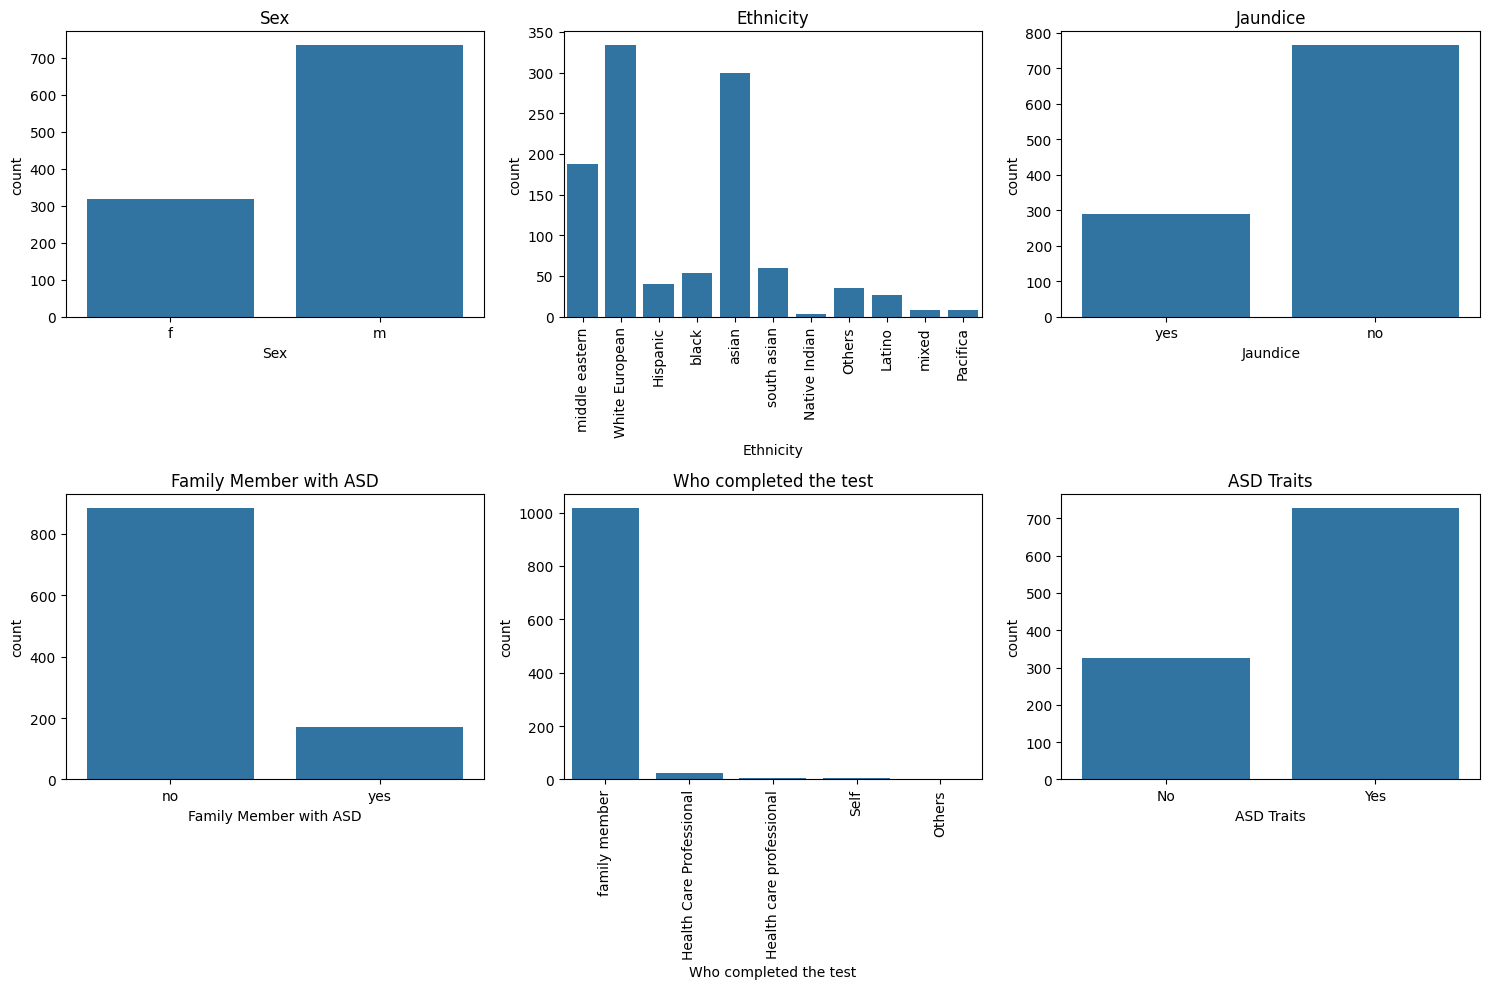

In [84]:
# Selecionar apenas as colunas categóricas
categorical_columns = tea_data.select_dtypes(include=['object']).columns

# Visualiação de countplots para cada atributo categórico
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.ravel()
for i, col in enumerate(categorical_columns):
    sns.countplot(x=tea_data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

**Histograma**

---
Para avaliação dos dados númericos iremos utilizar o histograma que é útil para visualizar a distribuição dos dados em uma variável numérica. Eles podem ajudar a identificar padrões de distribuição, como normalidade, assimetria e presença de outliers.


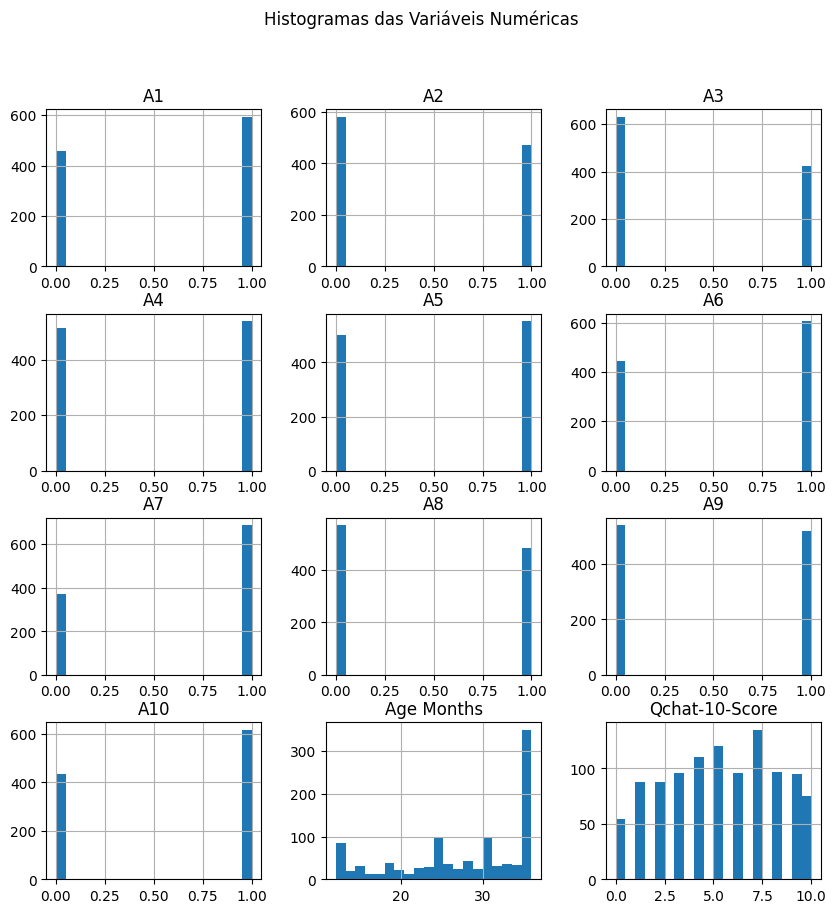

In [85]:
# Identificar colunas numéricas
numeric_columns = tea_data.select_dtypes(include=['int64', 'float64']).columns

# Histogramas
tea_data[numeric_columns].hist(bins=20, figsize=(10, 10))
plt.suptitle('Histogramas das Variáveis Numéricas')
plt.show()

Optei por excluir a coluna **Qchart-10-Score**, uma vez que esta atribui uma pontuação que poderia potencialmente influenciar o resultado da classificação.

Ao manter esse atributo, existe o risco de o modelo se tornar sobre-ajustado aos dados de treinamento, prejudicando sua capacidade de generalização para novos dados.

###4.3 Visualizações Multimodais - ok
---
Nessa seção faremos visualizações gráficas que irá compor a análise que tem como foco a investigação dos traços do Transtorno do Espectro Autista (TEA) em relação a uma variedade de outros atributos coletados em nossa base de dados.

**Diagnostico de TEA em relação aos outros atributos**

---



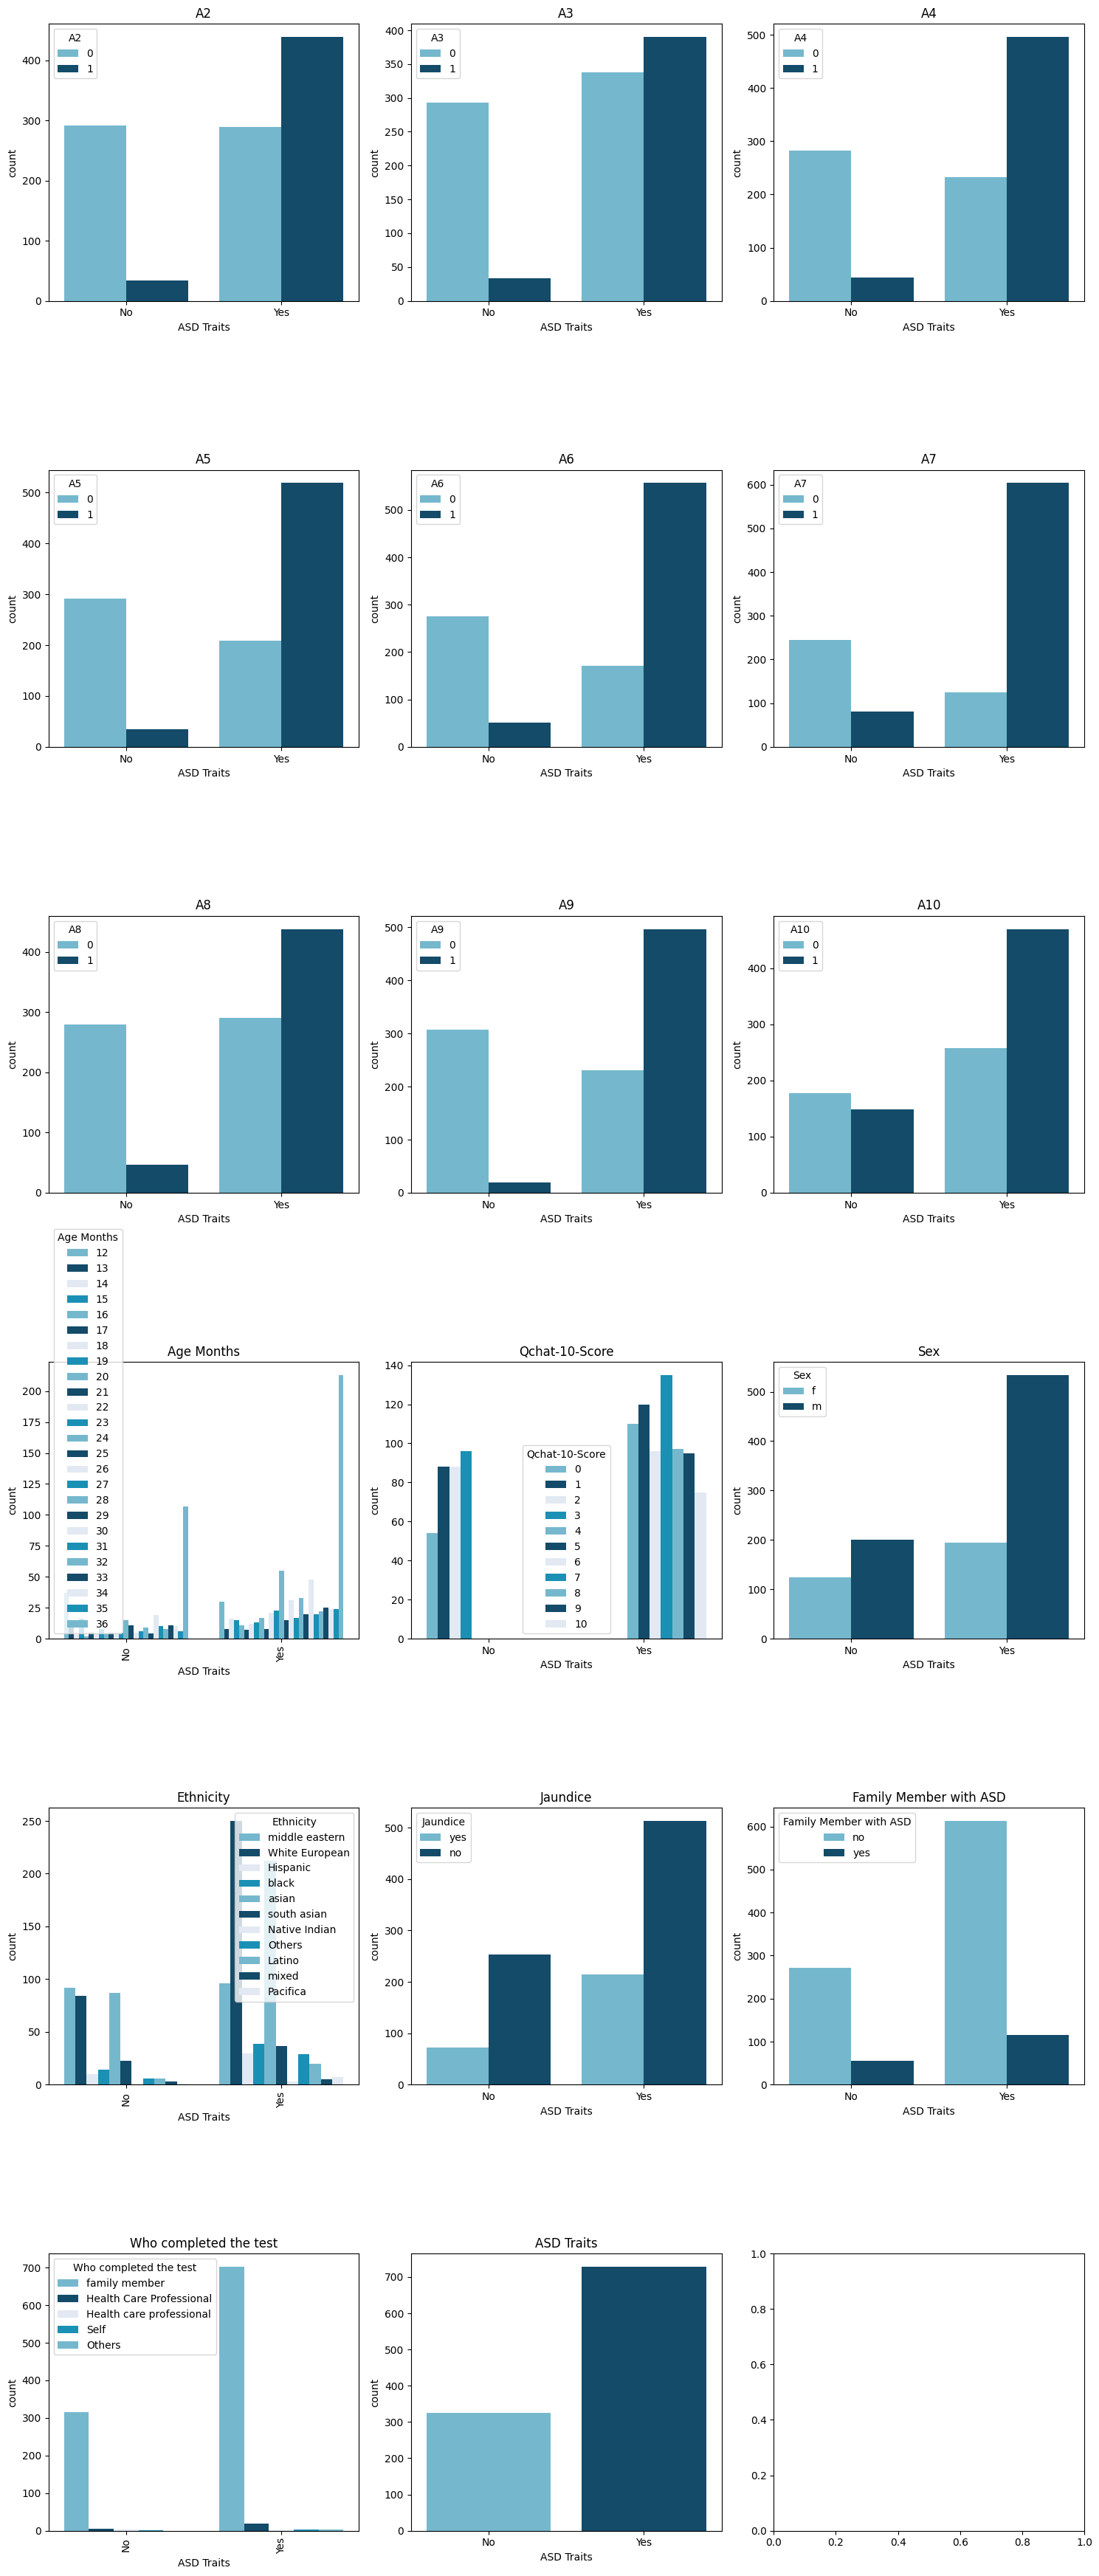

In [86]:
# Definir esquema de cores
colors = ['#66C0DC', '#054F77', '#DFE9F5', '#009DCF']

# Criar subplots
fig, axes = plt.subplots(6, 3, figsize=(15, 35))

axes = axes.ravel()
for i, col in enumerate(tea_data.iloc[:, 1:]):
    sns.countplot(x=tea_data["ASD Traits"], hue=tea_data[col], ax=axes[i], palette=colors)
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()


**Diagnostico de TEA em relação a Étnia**

---

Nesta seção, iremos analisar a distribuição étnia nos casos positivos e negativos de Transtorno do Espectro Autista (TEA), visando compreender possíveis associações entre etnia e o diagnóstico de TEA.

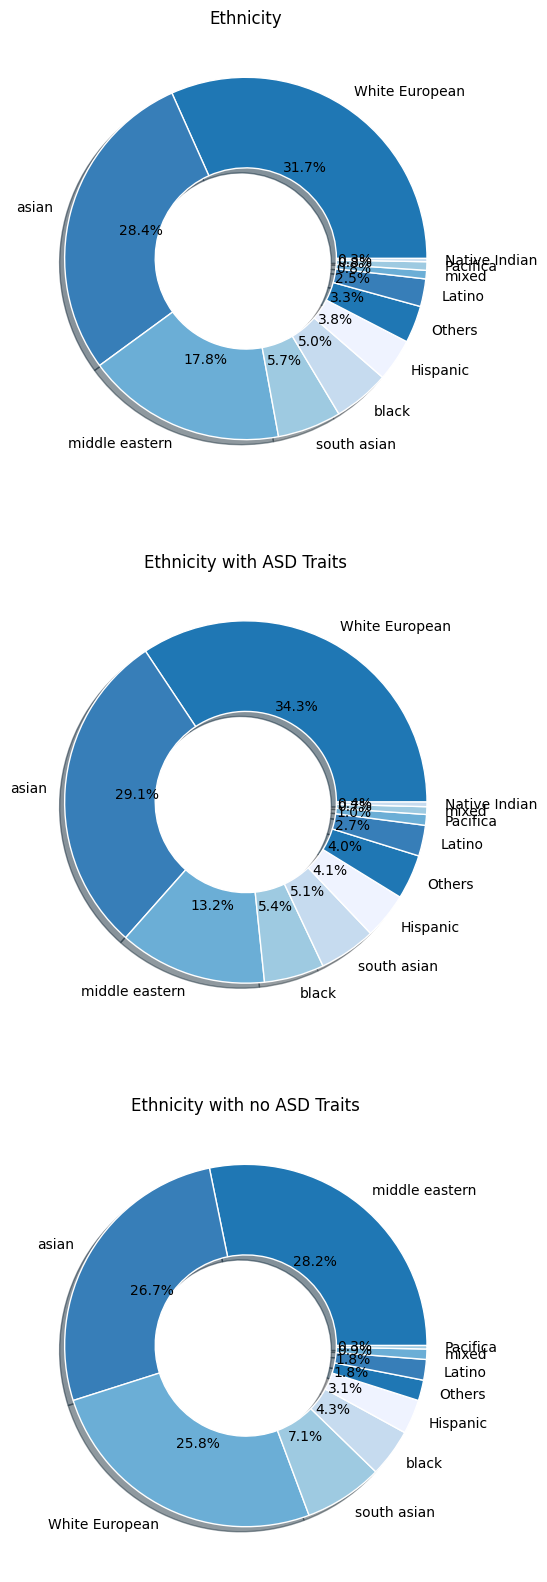

In [87]:
# Definir tamanho das fatias do gráfico de pizza
size = 0.5

# Definir os valores e rótulos para a primeira parte do gráfico
eth_vals = tea_data["Ethnicity"].value_counts()
labels_eth = eth_vals.index

# Definir os valores e rótulos para as outras partes do gráfico
yes = tea_data[tea_data["ASD Traits"]=="Yes"]["Ethnicity"].value_counts()
no = tea_data[tea_data["ASD Traits"]=="No"]["Ethnicity"].value_counts()

# Criar a figura e os subplots
fig, ax = plt.subplots(3,1, figsize=(20, 20))

# Definir lista de cores azuis
blue_colors = ['#1f77b4', '#377eb8', '#6baed6', '#9ecae1', '#c6dbef', '#eff3ff']

# Plotar os gráficos de pizza
ax[0].pie(eth_vals, radius=1, colors=blue_colors, labels=labels_eth, autopct="%1.1f%%", shadow=True, wedgeprops=dict(width=size, edgecolor='w'))
ax[0].set_title("Ethnicity")

ax[1].pie(yes, radius=1, colors=blue_colors, labels=yes.index, autopct="%1.1f%%", shadow=True, wedgeprops=dict(width=size, edgecolor='w'))
ax[1].set_title("Ethnicity with ASD Traits")

ax[2].pie(no, radius=1, colors=blue_colors, labels=no.index, autopct="%1.1f%%", shadow=True, wedgeprops=dict(width=size, edgecolor='w'))
ax[2].set_title("Ethnicity with no ASD Traits")

plt.show()



Concluímos que as características do Transtorno do Espectro Autista (TEA) apresentam uma prevalência significativamente alta no Oriente Médio e na Europa Branca, enquanto em Pacifica e Latino essa prevalência é substancialmente menor.

**Conclusão**

---

Com base nas visualizações Unimodais e Multimodais concluímos que há uma disparidade significativa entre os gêneros masculino e feminino, com uma proporção de mais que o dobro de casos masculinos em relação aos femininos.

Além disso, os dados revelam que em todos os casos analisados, algumas crianças apresentavam o Transtorno do Espectro Autista (TEA), enquanto membros de suas famílias não tinham o diagnóstico. Isso sugere que o TEA não é exclusivamente genético.

Notavelmente, constatamos que o dobro de crianças positivas para o autismo não apresentaram histórico de icterícia neonatal.

Constatamos que o atributo **Who completed the test** não apresenta relevância para o objetivo do nosso estudo. Portanto, optamos por **removê-los** durante a etapa de pré-processamento dos dados.

## 5.0 Pré-Processamento de dados
---
Nesta etapa, iremos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, e se necessário transformações.

### 5.1 Tratamento de Missings e Limpeza - ok
---

Nesta etapa, procuraremos identificar e eliminar quaisquer irregularidades presentes no conjunto de dados, visando aprimorar e elevar sua qualidade. O processo de limpeza de dados inclui a verificação da coerência das informações, a correção de eventuais erros e a gestão de valores nulos e/ou redundantes, seja preenchendo-os adequadamente ou removendo-os.

Produziremos nesse momento o tratamento e as manipulações em um *dataset* provisório, preservando o *dataset* original.

In [88]:
# Salvando um NOVO dataset para tratamento de missings, com cuidado para não sobrescrever o dataset original
tea_data_tratamento = tea_data

Como já havíamos verificado anteriormente, não temos redundância no *dataset*.

In [89]:
tea_data_tratamento.nunique()

A1                         2
A2                         2
A3                         2
A4                         2
A5                         2
A6                         2
A7                         2
A8                         2
A9                         2
A10                        2
Age Months                25
Qchat-10-Score            11
Sex                        2
Ethnicity                 11
Jaundice                   2
Family Member with ASD     2
Who completed the test     5
ASD Traits                 2
dtype: int64

Confirmaremos a existência de dados nulos (*NULL*) para cada atributo do *dataset*.

In [90]:
# # Verificando dados nulos nos atributos
tea_data_tratamento.isnull().sum()

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age Months                0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family Member with ASD    0
Who completed the test    0
ASD Traits                0
dtype: int64

Corfome visto anteriormente não possuimos valores nulos para tratamento.

In [91]:
#Excluindo as colunas Qchart-10-Score e Who completed the test
tea_data_tratamento.drop(columns=["Qchat-10-Score", "Who completed the test"], inplace=True)

Foi observado que o atributo 'Age Months', que representa a idade das crianças em meses, é do tipo contínuo. Dado que alguns modelos têm dificuldades em lidar diretamente com valores textuais, optou-se por converter as categorias em valores numéricos.

In [92]:
#Identificando a idade minima e maxima do nosso dataset
mini = tea_data_tratamento["Age Months"].min()
maxi = tea_data_tratamento["Age Months"].max()
print(f"Idade minima {mini} meses e a idade máxima {maxi} meses")

Idade minima 12 meses e a idade máxima 36 meses


In [93]:
# Criar uma coluna 'Age' dividindo 'Age Months' por 12 e converter para inteiros
tea_data_tratamento["Age"] = (tea_data_tratamento["Age Months"] / 12).astype(int)

# Excluir a coluna 'Age Months'
tea_data_tratamento.drop(columns=["Age Months"], inplace=True)


In [94]:
tea_data_tratamento.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Sex,Ethnicity,Jaundice,Family Member with ASD,ASD Traits,Age
1,0,0,0,0,0,0,1,1,0,1,f,middle eastern,yes,no,No,2
2,1,1,0,0,0,1,1,0,0,0,m,White European,yes,no,Yes,3
3,1,0,0,0,0,0,1,1,0,1,m,middle eastern,yes,no,Yes,3
4,1,1,1,1,1,1,1,1,1,1,m,Hispanic,no,no,Yes,2
5,1,1,0,1,1,1,1,1,1,1,f,White European,no,yes,Yes,1


In [95]:
#Mudando a ordem das colunas
order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',  'Age', 'Sex', 'Ethnicity', 'Jaundice', 'Family Member with ASD', 'ASD Traits']
tea_data_tratamento = tea_data_tratamento[order]

In [96]:
tea_data_tratamento.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family Member with ASD,ASD Traits
1,0,0,0,0,0,0,1,1,0,1,2,f,middle eastern,yes,no,No
2,1,1,0,0,0,1,1,0,0,0,3,m,White European,yes,no,Yes
3,1,0,0,0,0,0,1,1,0,1,3,m,middle eastern,yes,no,Yes
4,1,1,1,1,1,1,1,1,1,1,2,m,Hispanic,no,no,Yes
5,1,1,0,1,1,1,1,1,1,1,1,f,White European,no,yes,Yes


In [97]:
tea_data_tratamento.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Sex', 'Ethnicity', 'Jaundice', 'Family Member with ASD', 'ASD Traits'],
      dtype='object')

### 5.2 Preparação dos Dados - ok
---

Nesta etapa, iremos realizar operações de preparação dos dados.

**LABEL ENCODING**

---
Usaremos a tecnica Label Encoding para converter colunas categóricas em numéricas para que possam ser ajustadas por modelos de aprendizado de máquina que aceitam apenas dados numéricos. É uma importante etapa de pré-processamento em um projeto de aprendizado de máquina.

In [98]:
le = LabelEncoder()
tea_data_tratamento["Sex"] = le.fit_transform(tea_data_tratamento["Sex"])
tea_data_tratamento["Jaundice"] = le.fit_transform(tea_data_tratamento["Jaundice"])
tea_data_tratamento["Family Member with ASD"] = le.fit_transform(tea_data_tratamento["Family Member with ASD"])
tea_data_tratamento["ASD Traits"] = le.fit_transform(tea_data_tratamento["ASD Traits"])
tea_data_tratamento.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family Member with ASD,ASD Traits
1,0,0,0,0,0,0,1,1,0,1,2,0,middle eastern,1,0,0
2,1,1,0,0,0,1,1,0,0,0,3,1,White European,1,0,1
3,1,0,0,0,0,0,1,1,0,1,3,1,middle eastern,1,0,1
4,1,1,1,1,1,1,1,1,1,1,2,1,Hispanic,0,0,1
5,1,1,0,1,1,1,1,1,1,1,1,0,White European,0,1,1


**ONEHOT ENCODING**

---

Usamos o OneHot Encoding quando precisamos converter as variáveis categóricas com múltiplas categorias e queremos representá-las como vetores binários. Por exemplo, se temos uma variável "cor" com categorias "vermelho", "azul" e "verde", usar o One-Hot Encoding criaria três novas variáveis binárias: "vermelho" (1 ou 0), "azul" (1 ou 0) e "verde" (1 ou 0). Isso permite que modelos de machine learning entendam as diferentes categorias sem atribuir importâncias relativas incorretas. O One-Hot Encoding é comumente utilizado em algoritmos como regressão logística, redes neurais e árvores de decisão.

In [99]:
tea_data_tratamento = pd.get_dummies(tea_data_tratamento, columns=["Ethnicity"], drop_first=True)
tea_data_tratamento = tea_data_tratamento.astype(int)
tea_data_tratamento.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian
1,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


###5.3 Divisão de Dados

---
Iremos entrar na etapa de divisão de dados que é um processo fundamental em machine learning onde o conjunto de dados disponível é dividido em conjuntos distintos para diferentes finalidades, como treinamento, validação e teste.

In [100]:
tea_data_limpo = tea_data_tratamento.copy()


In [101]:
tea_data_limpo

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian
1,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1051,0,0,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1052,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1053,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


**Separação de Treino e Teste**

---


In [102]:
test_size = 0.20  # tamanho do conjunto de teste
seed = 7  # semente aleatória

# Separando features (X) e target (y)
X = tea_data_limpo.drop(columns=['ASD Traits']).values
y = tea_data_limpo['ASD Traits'].values

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    shuffle=True,
                                                    random_state=seed,
                                                    stratify=y)  # holdout com estratificação

# Obtendo o número de instâncias e atributos dos conjuntos de treinamento e teste
print(f"Número de instâncias e atributos dos dados de treinamento: {X_train.shape}")
print(f"Número de instâncias e atributos dos dados de teste: {X_test.shape}")

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)  # validação cruzada com estratificação


Número de instâncias e atributos dos dados de treinamento: (843, 24)
Número de instâncias e atributos dos dados de teste: (211, 24)


**Feature Importance**

---

O Feature Importance é uma abordagem válida e útil para entender melhor o comportamento do modelo, selecionar características relevantes e otimizar o desempenho preditivo do modelo.

Text(0.5, 1.0, 'Importância de cada feature')

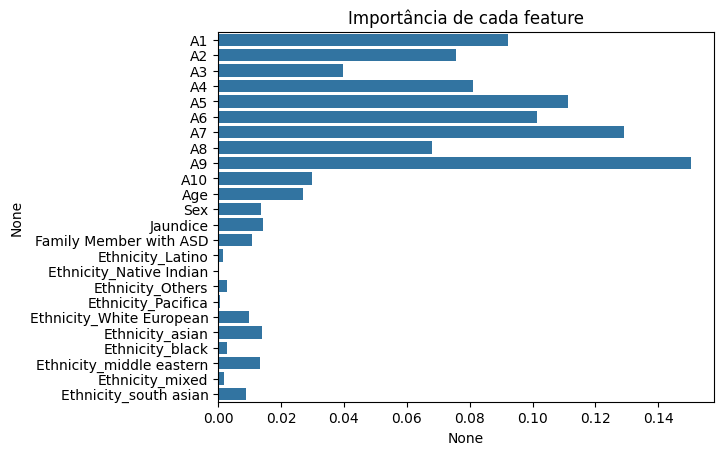

In [110]:
X = tea_data_limpo[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Sex', 'Jaundice', 'Family Member with ASD', 'Ethnicity_Latino', 'Ethnicity_Native Indian', 'Ethnicity_Others',
       'Ethnicity_Pacifica', 'Ethnicity_White European', 'Ethnicity_asian',
       'Ethnicity_black', 'Ethnicity_middle eastern', 'Ethnicity_mixed',
       'Ethnicity_south asian']].copy()
y = tea_data_limpo['ASD Traits'].copy()

# Criando e treinando o modelo
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)

# Mostrando importância de cada feature
importances = pd.Series(data=model.feature_importances_, index=X.columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')


Com base na análise exploratória e na importância das características, decidimos remover a variável "Family Member with ASD" do conjunto de características para nossa modelagem.

In [117]:
tea_data_treino = tea_data_limpo.copy()
tea_data_treino = tea_data_treino.drop(['Family Member with ASD'], axis=1)

## 6.0 Construção do Modelo
---

Model building, ou construção de modelo, refere-se ao processo de criação e desenvolvimento de um modelo de machine learning com o objetivo de resolver um problema específico.


**Modelagem Linha de Base**

---

Nesta fase inicial da modelagem, estabelecemos uma linha de base para avaliar o desempenho inicial dos modelos. Esta etapa serve como referência para comparar o progresso e a eficácia das técnicas subsequentes.

KNN: 0.954930 (0.016565)
CART: 0.914524 (0.031896)
NB: 0.665602 (0.037594)
SVM: 0.982213 (0.012152)
Bagging: 0.942969 (0.027649)
RF: 0.963179 (0.018827)
ET: 0.963193 (0.020245)
GB: 0.967969 (0.018406)
Voting: 0.949034 (0.024243)


{'whiskers': [<matplotlib.lines.Line2D at 0x7ac722605840>,
 'caps': [<matplotlib.lines.Line2D at 0x7ac722605d80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ac7226056c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ac72268c460>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ac72268c700>,
 'means': []}

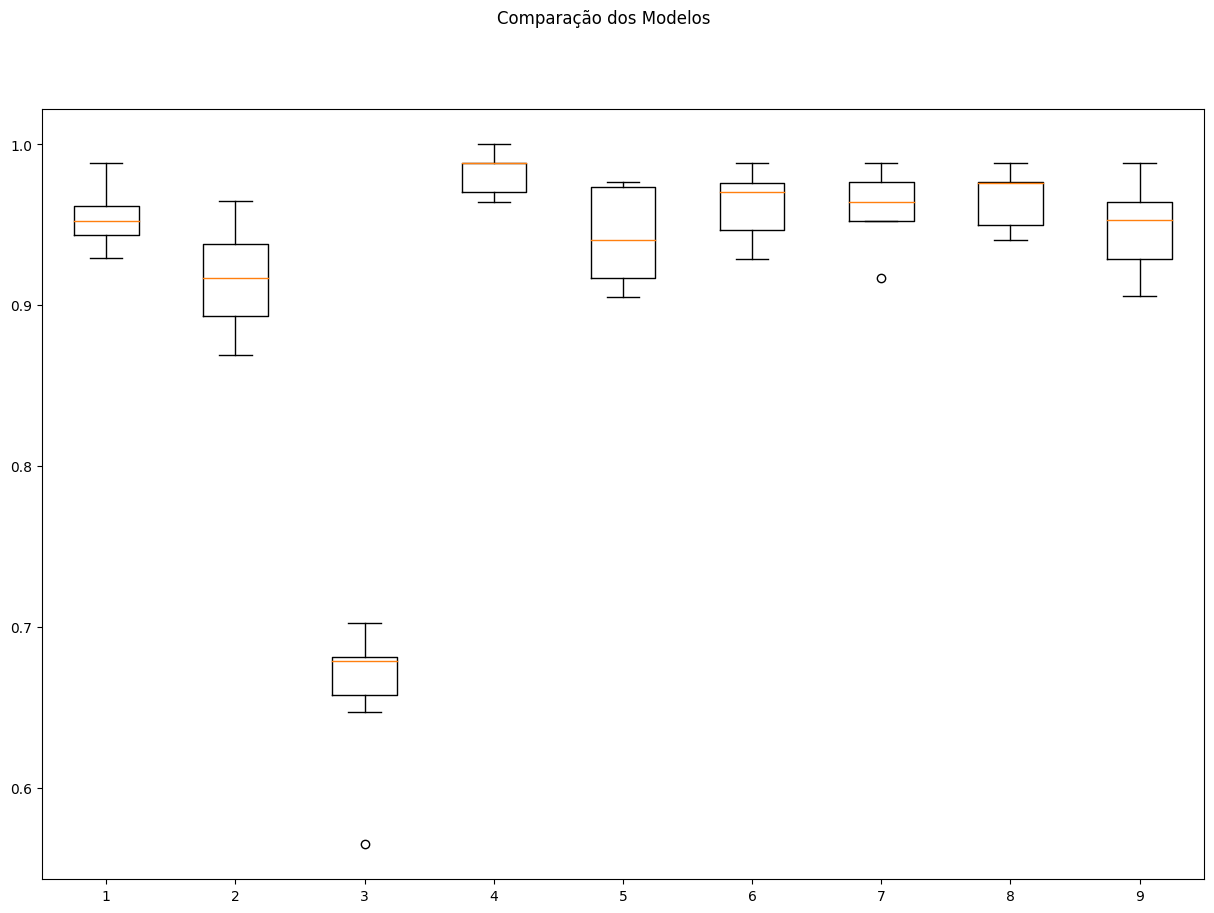

In [119]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)


Os três melhores resultados são:

Logistic Regression (LR) com acurácia de 1.000000 e recall de 1.000000.

AdaBoost (Ada) também com acurácia de 1.000000 e recall de 1.000000.

Support Vector Machine (SVM) com acurácia de 0.982213 e recall de 0.993133.


**Modelagem dados Padronizados e Normalizados**

---
Nesta seção, iremos criar e avaliar modelos utilizando os dados que foram padronizados e normalizados. Esse processo é fundamental para garantir que todas as variáveis tenham a mesma escala e estão dentro de um intervalo específico, o que pode melhorar o desempenho dos modelos de machine learning.

LR-orig: 1.000 (0.000)
KNN-orig: 0.955 (0.017)
CART-orig: 0.915 (0.032)
NB-orig: 0.666 (0.038)
SVM-orig: 0.982 (0.012)
Bag-orig: 0.943 (0.028)
RF-orig: 0.963 (0.019)
ET-orig: 0.963 (0.020)
Ada-orig: 1.000 (0.000)
GB-orig: 0.967 (0.018)
Vot-orig: 0.986 (0.012)
LR-padr: 0.999 (0.004)
KNN-padr: 0.942 (0.014)
CART-padr: 0.917 (0.029)
NB-padr: 0.539 (0.045)
SVM-padr: 0.975 (0.014)
Bag-padr: 0.947 (0.016)
RF-padr: 0.962 (0.022)
ET-padr: 0.955 (0.024)
Ada-padr: 1.000 (0.000)
GB-padr: 0.967 (0.018)
Vot-padr: 0.985 (0.011)
LR-norm: 1.000 (0.000)
KNN-norm: 0.945 (0.024)
CART-norm: 0.918 (0.027)
NB-norm: 0.642 (0.041)
SVM-norm: 0.982 (0.011)
Bag-norm: 0.941 (0.026)
RF-norm: 0.963 (0.018)
ET-norm: 0.956 (0.023)
Ada-norm: 1.000 (0.000)
GB-norm: 0.967 (0.018)
Vot-norm: 0.988 (0.011)


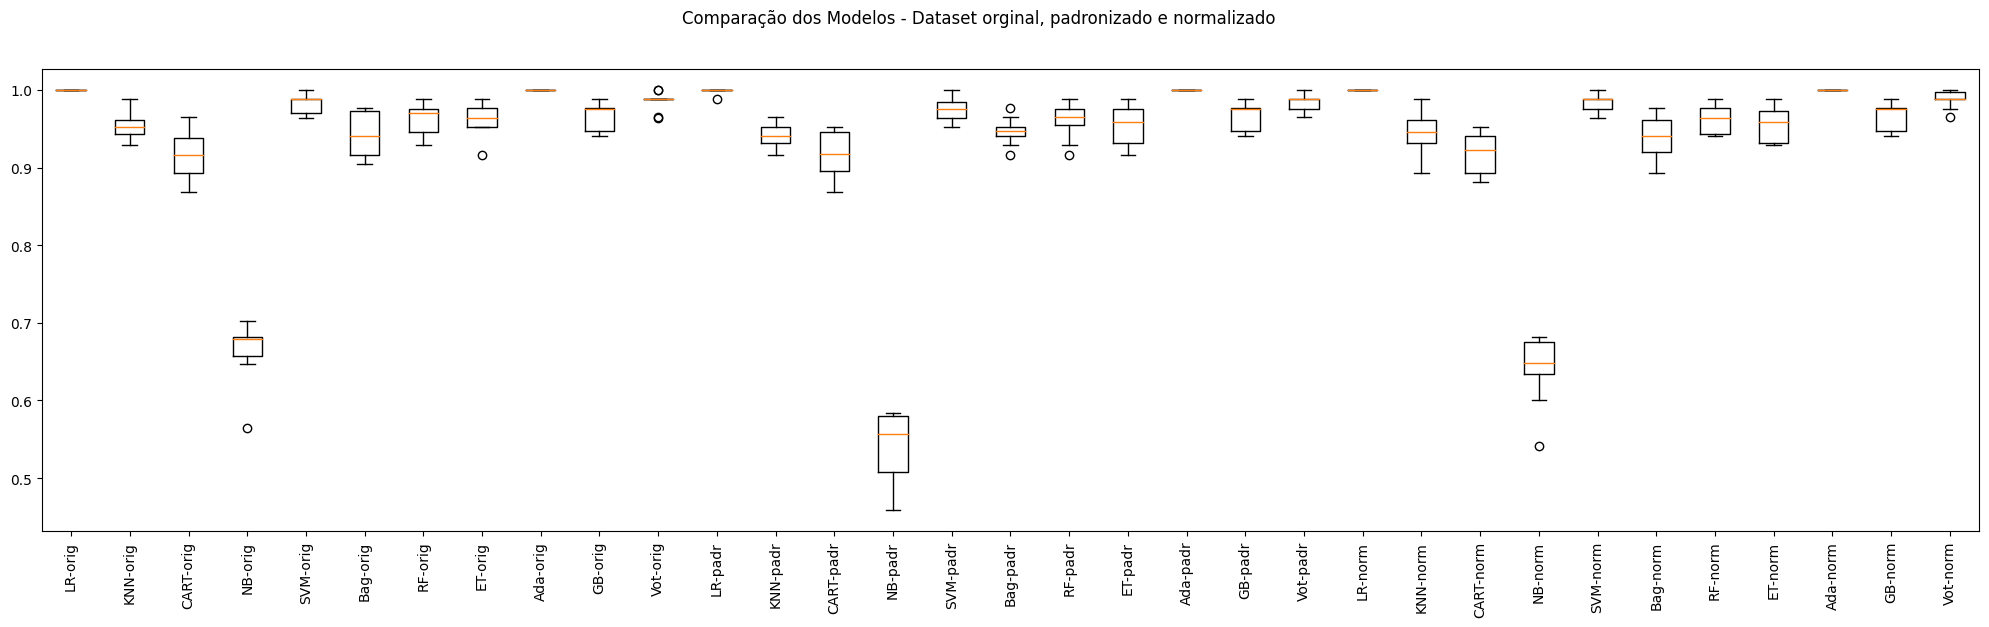

In [50]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Original (orig):

Naive Bayes (NB-orig): Precisão de 96.0%

CART (Árvores de Decisão) (CART-orig): Precisão de 95.7%

Bagging (Bag-orig): Precisão de 95.4%

Padronizado (padr):

Naive Bayes (NB-padr): Precisão de 96.0%

Árvores de Decisão (CART-padr): Precisão de 95.7%

Bagging (Bag-padr): Precisão de 95.3%

Normalizado (norm):

CART (Árvores de Decisão) (CART-norm): Precisão de 96.0%

Naive Bayes (NB-norm): Precisão de 96.0%

Bagging (Bag-norm): Precisão de 95.5%


### 6.6 Testando os Modelos

---
Nesta etapa, vamos testar cinco modelos de classificação diferentes para resolver o problema em questão. Testar esses modelos nos permitirá avaliar sua eficácia na tarefa de classificação e determinar qual deles é mais adequado para resolver o problema específico que estamos abordando.

In [180]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

1.0


O resultado da acuracia do modelo é de 95%.

In [181]:
# Novos dados - não sabemos a classe!
data = {'preg':  [1, 9, 5],
        'plas': [90, 100, 110],
        'pres': [50, 60, 50],
        'skin': [30, 30, 30],
        'test': [100, 100, 100],
        'mass': [20.0, 30.0, 40.0],
        'pedi': [1.0, 2.0, 1.0],
        'age': [15, 40, 40],
        }

atributos = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
entrada = pd.DataFrame(tea_data_limpo, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:23].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X_train
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)


ValueError: X has 8 features, but StandardScaler is expecting 23 features as input.

In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

## 5.0 Conclusão
---